# وارد کردن کتابخانه های مربوطه

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# وارد کردن دیتاست

In [2]:
df = pd.read_csv('Maindata\datacsv.csv',encoding='ISO-8859-1')
df.head() #نشان دادن 5 سطر اول دیتاست

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  12/1/2017                254     0             -5.2           37   
1  12/1/2017                204     1             -5.5           38   
2  12/1/2017                173     2             -6.0           39   
3  12/1/2017                107     3             -6.2           40   
4  12/1/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
df.describe() #اظلاعات کلی دیتاست

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

# Pair plot for numerical variables

<Figure size 2000x1200 with 0 Axes>

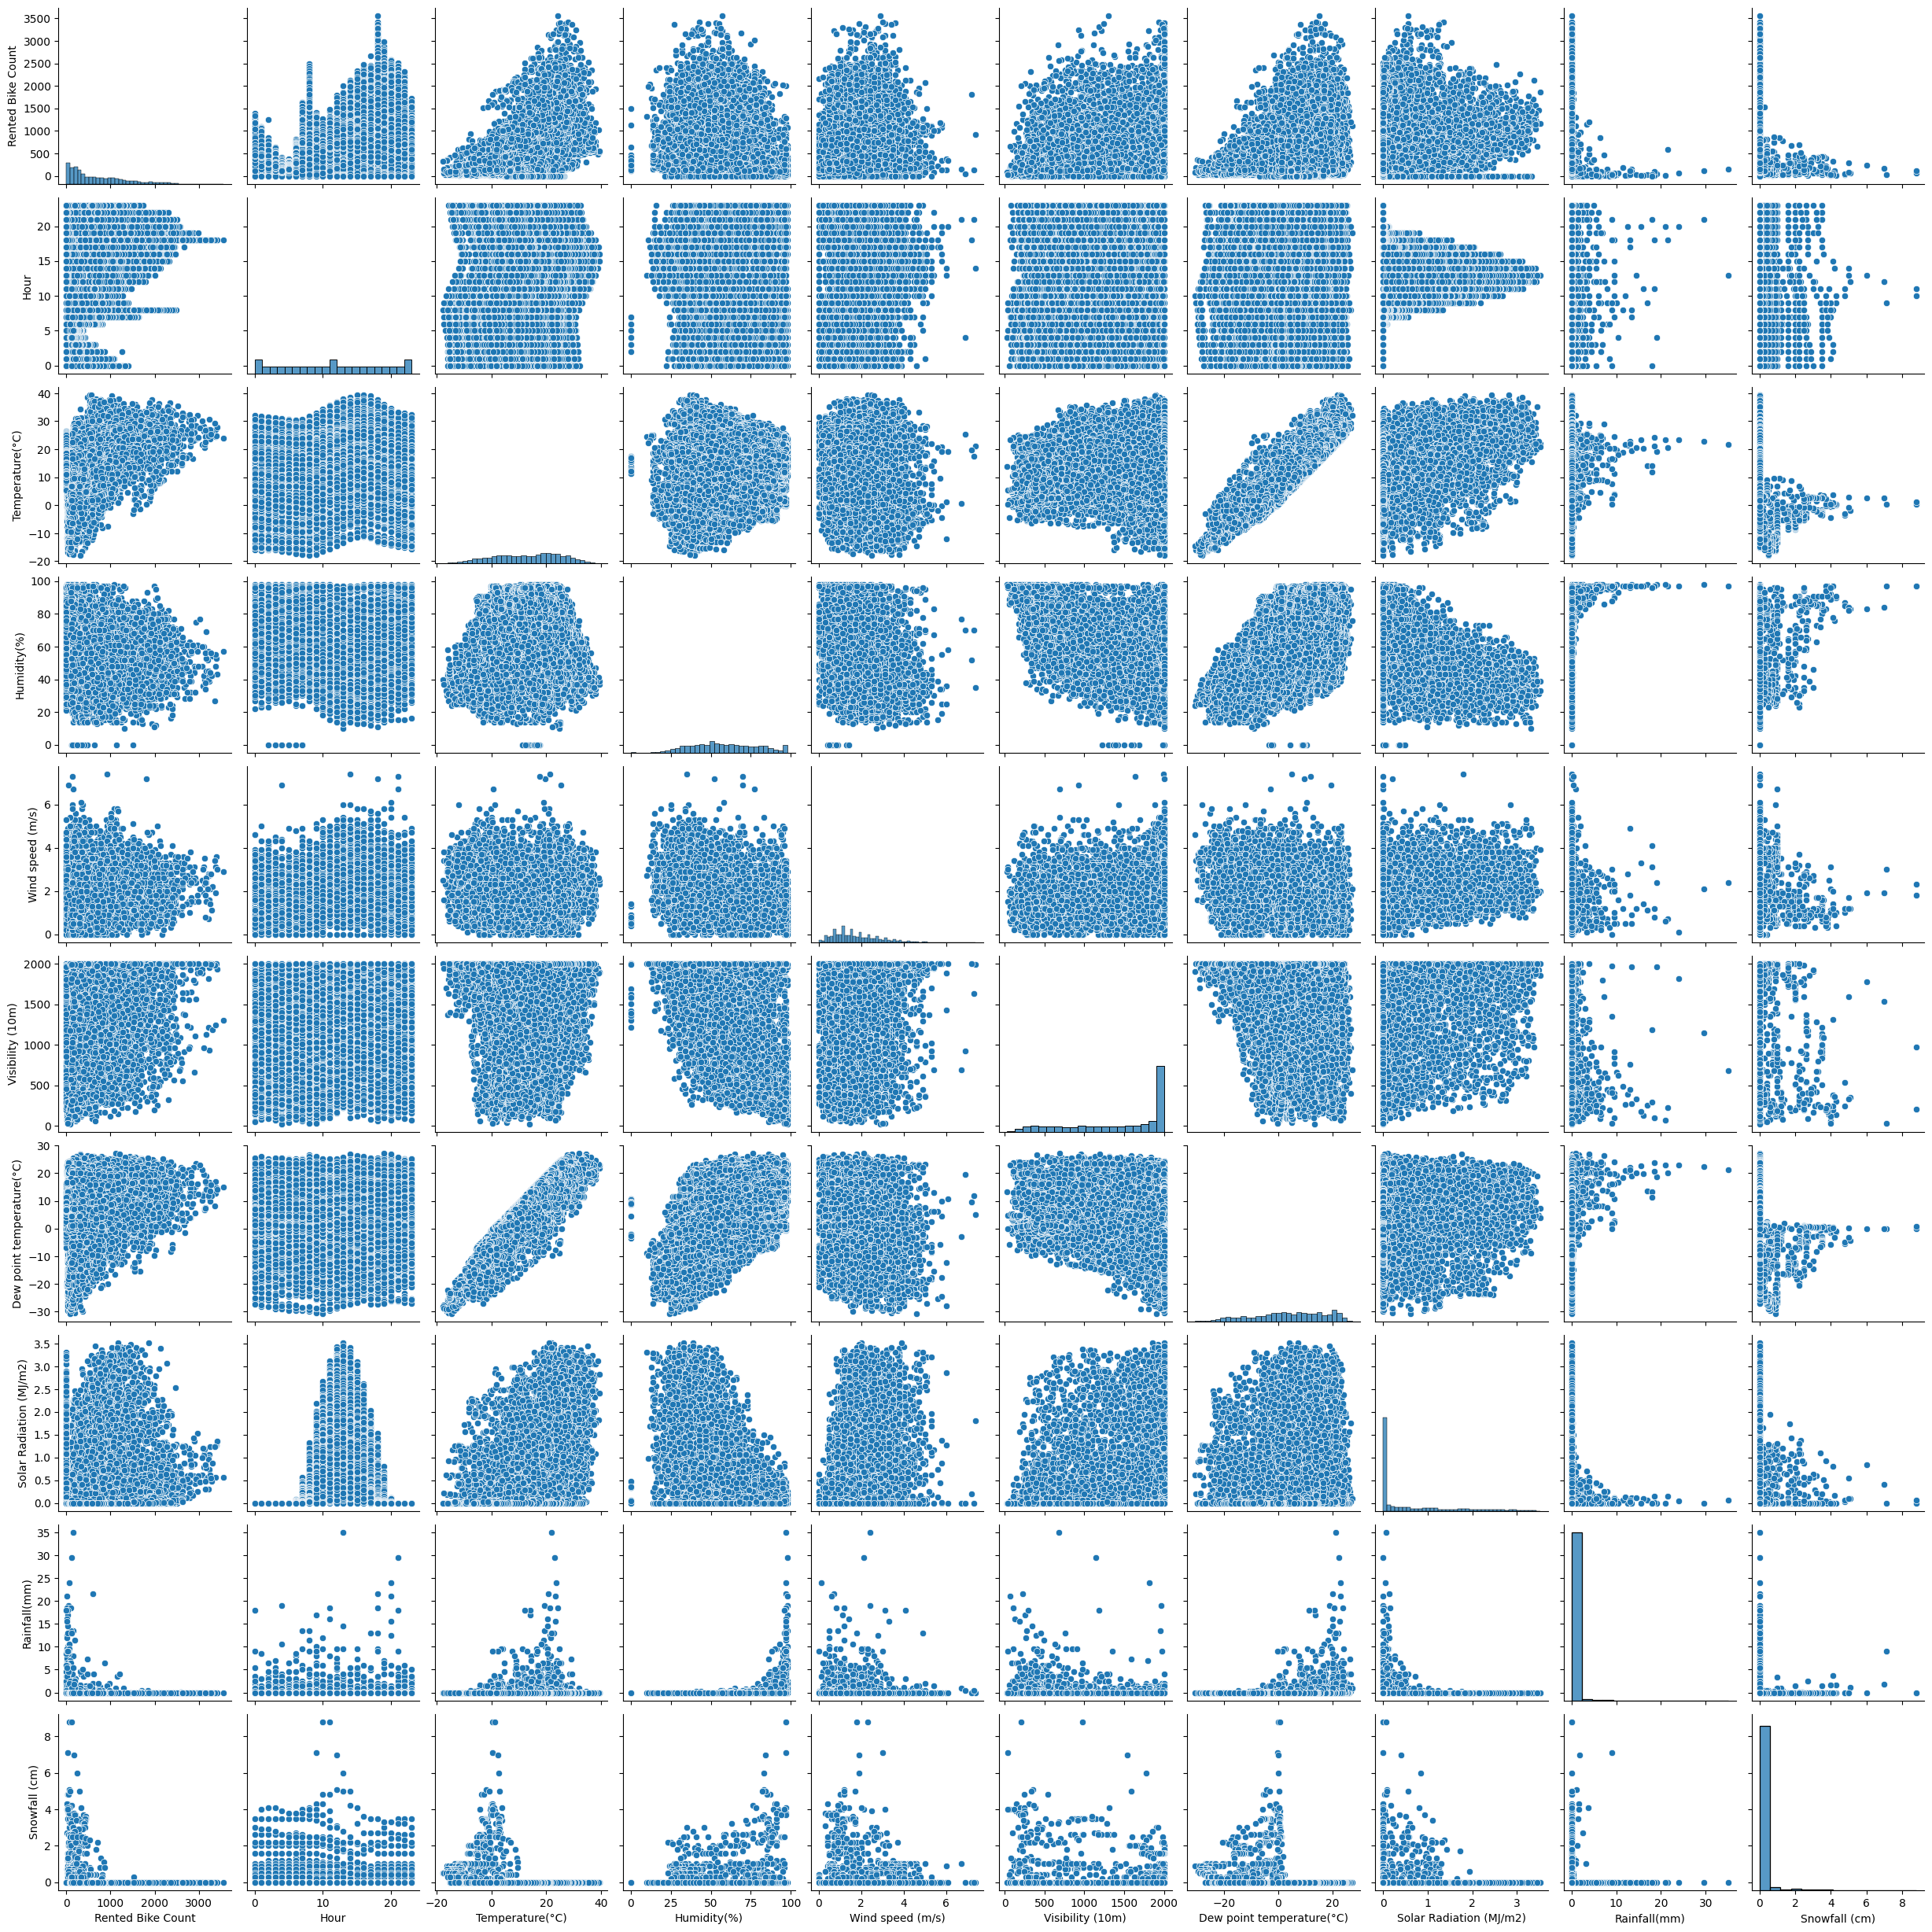

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6),dpi = 200)

sns.pairplot(df)

plt.show()

کد پایینی نسبت به کد بالا
فصل ها را نیز با رنگ داخل نمودار نشون می دهد


<Figure size 2000x1200 with 0 Axes>

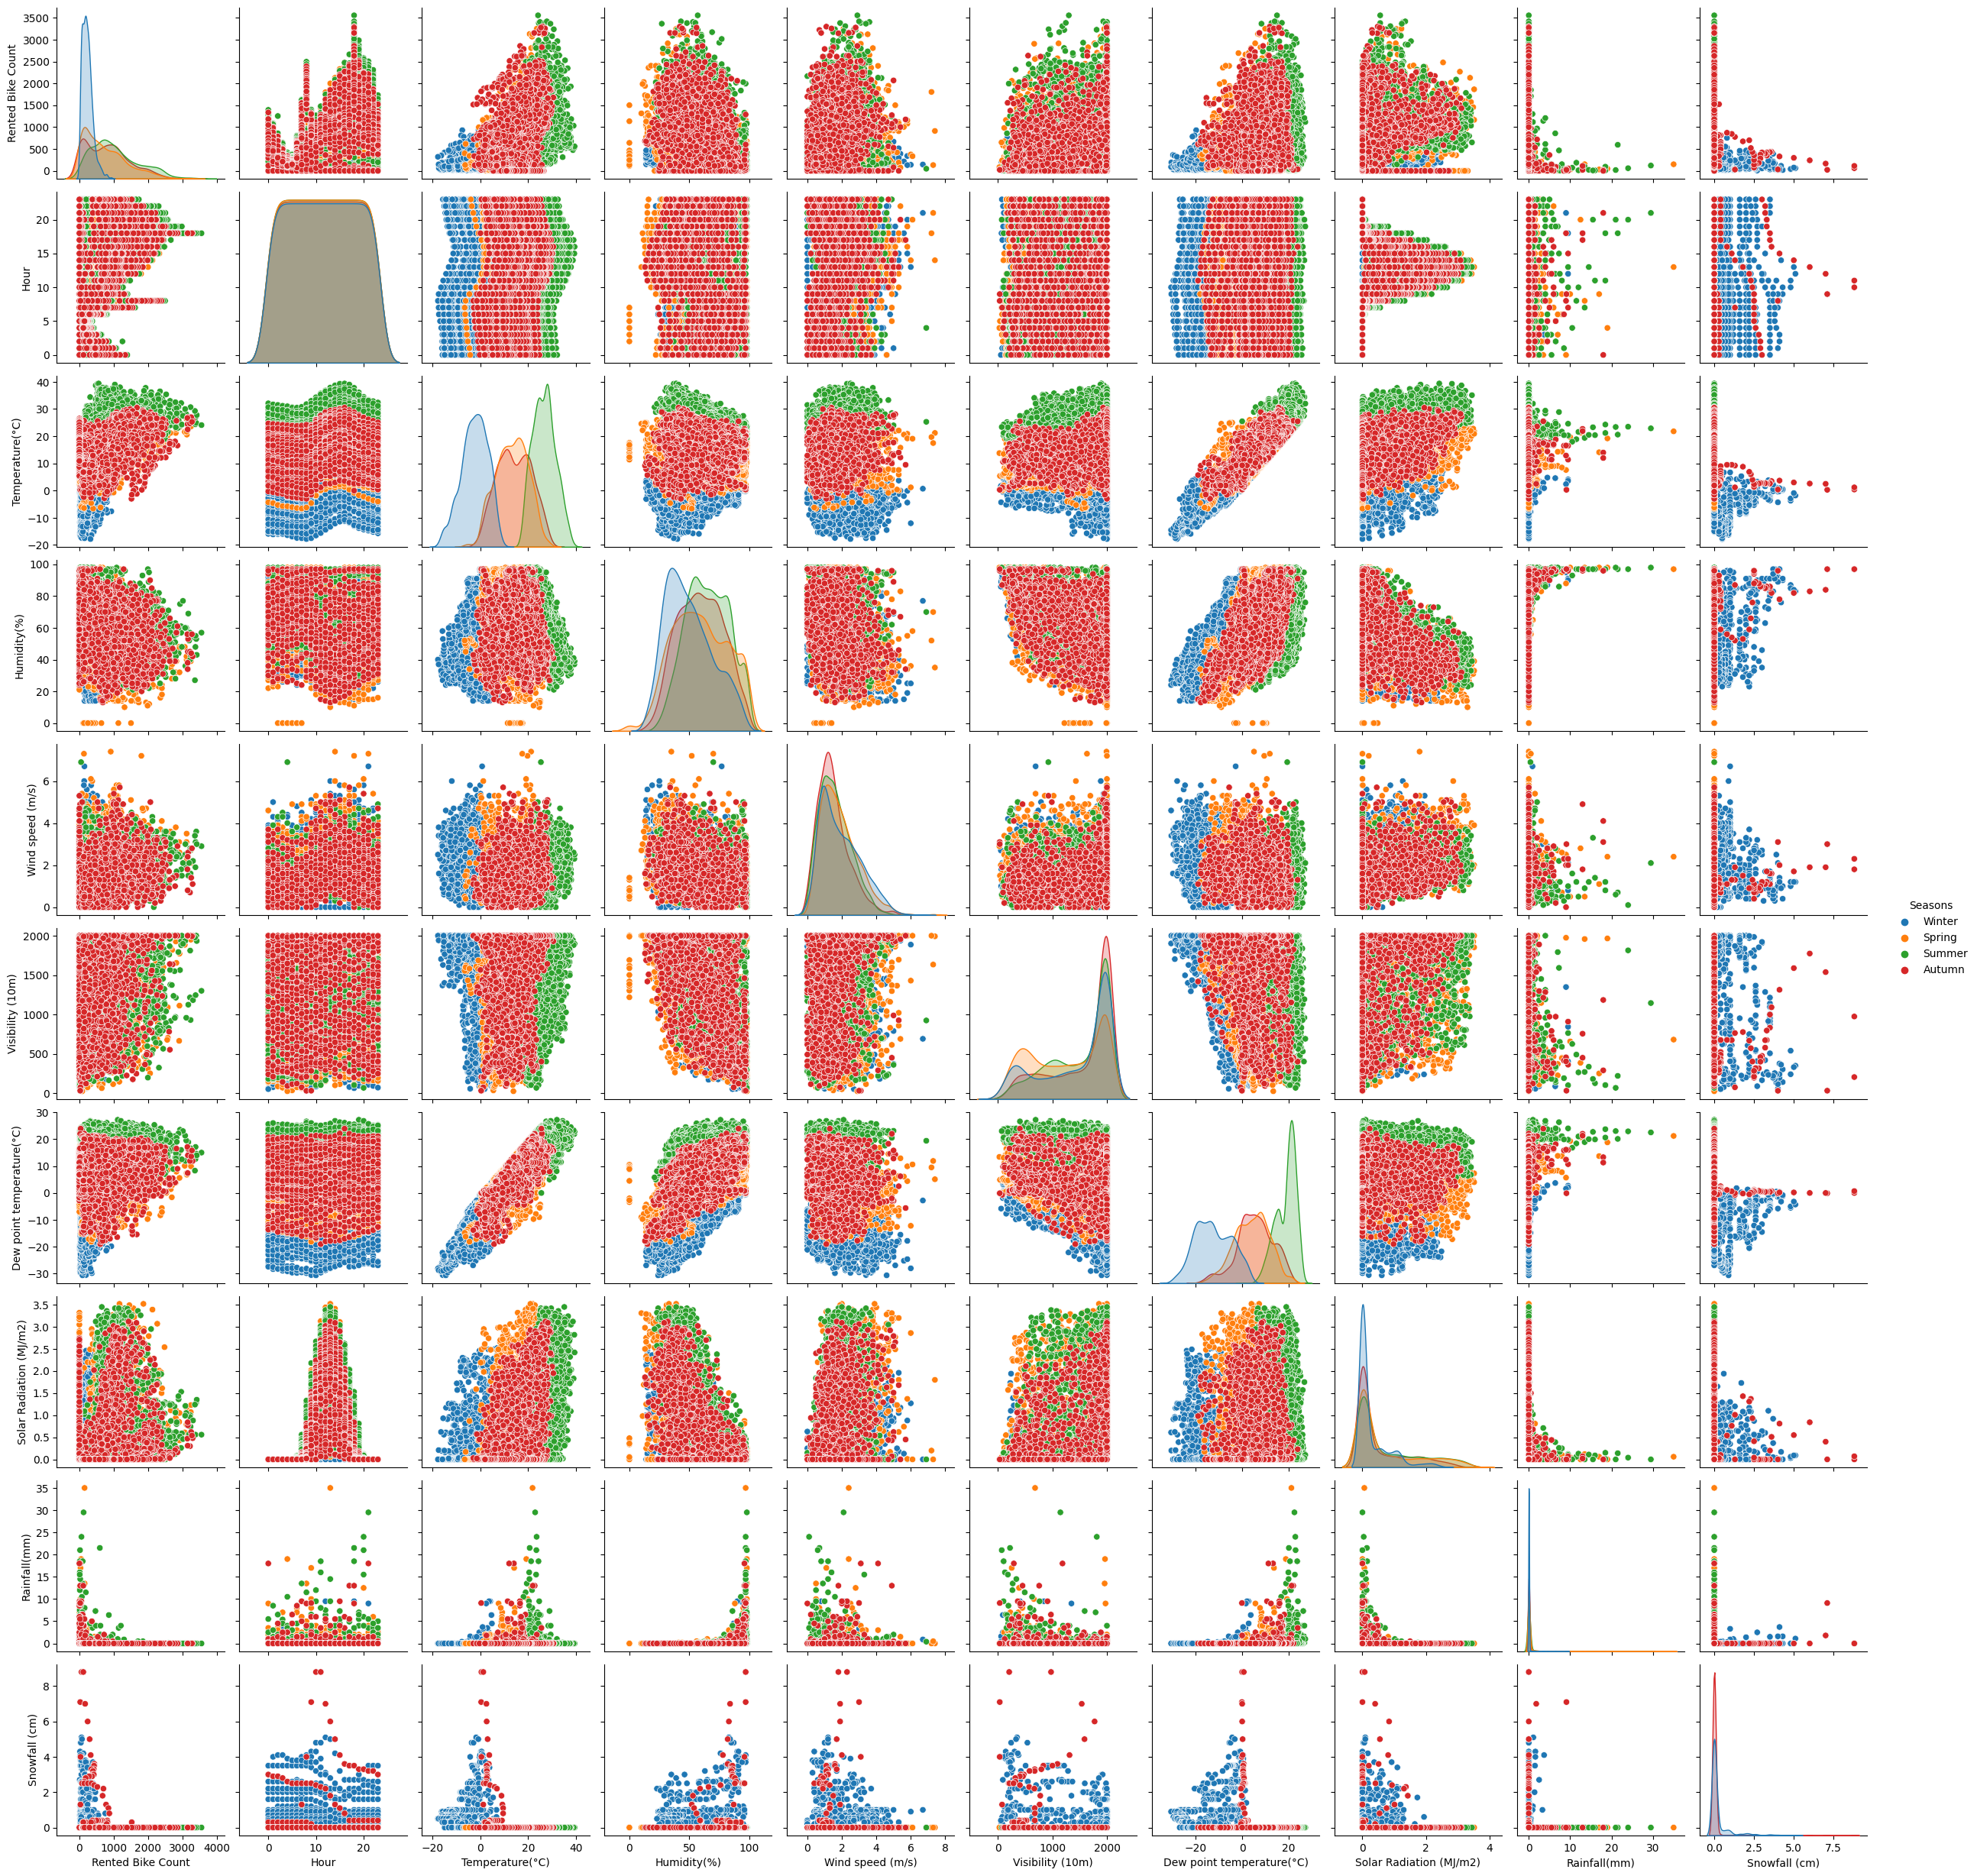

In [5]:


plt.figure(figsize = (10,6),dpi = 200)
sns.pairplot(df,hue='Seasons')
plt.show()


# HeatMap

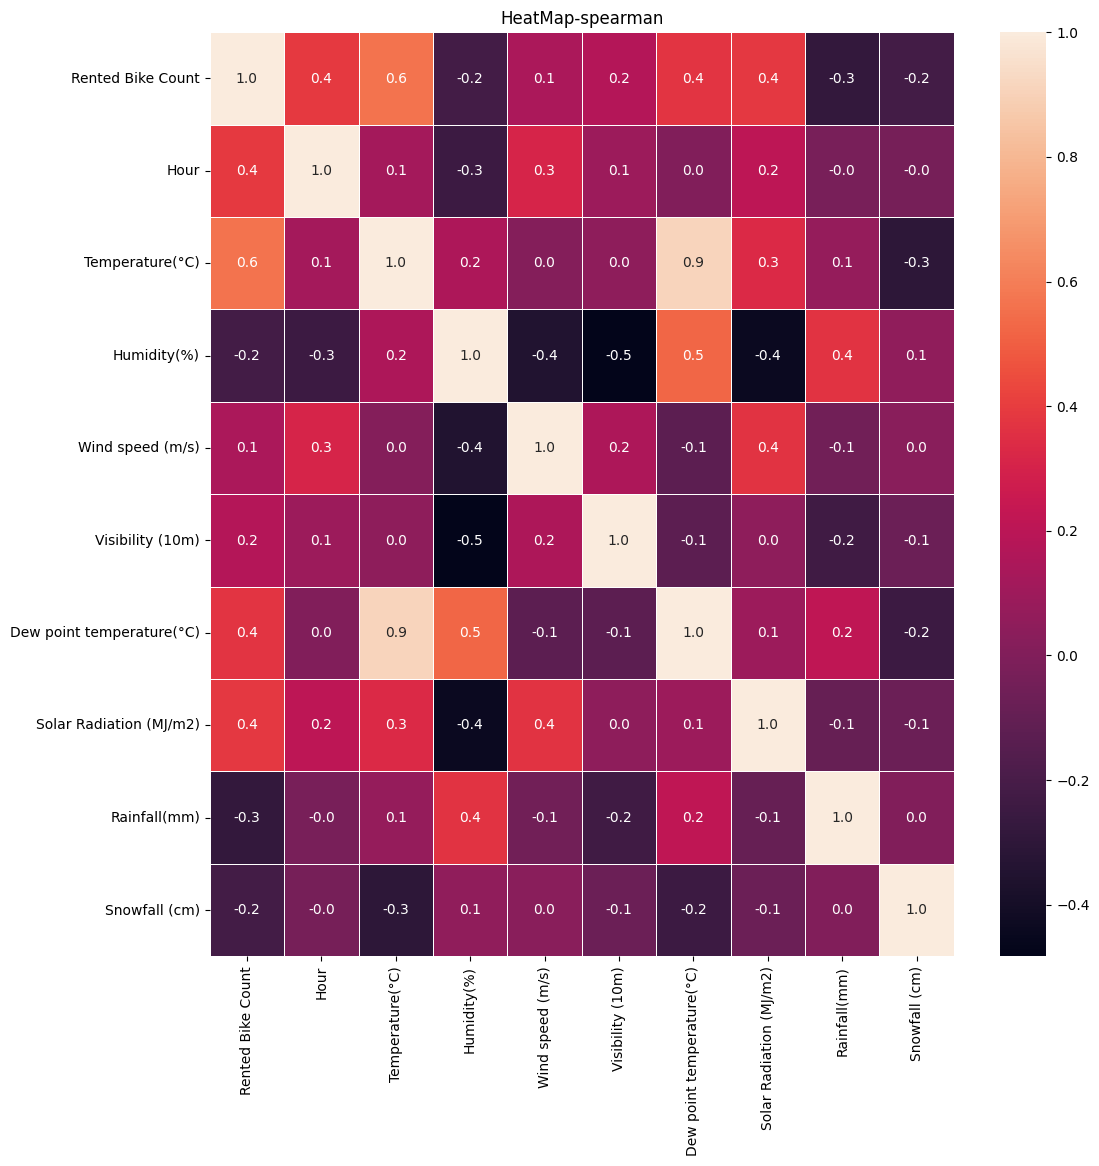

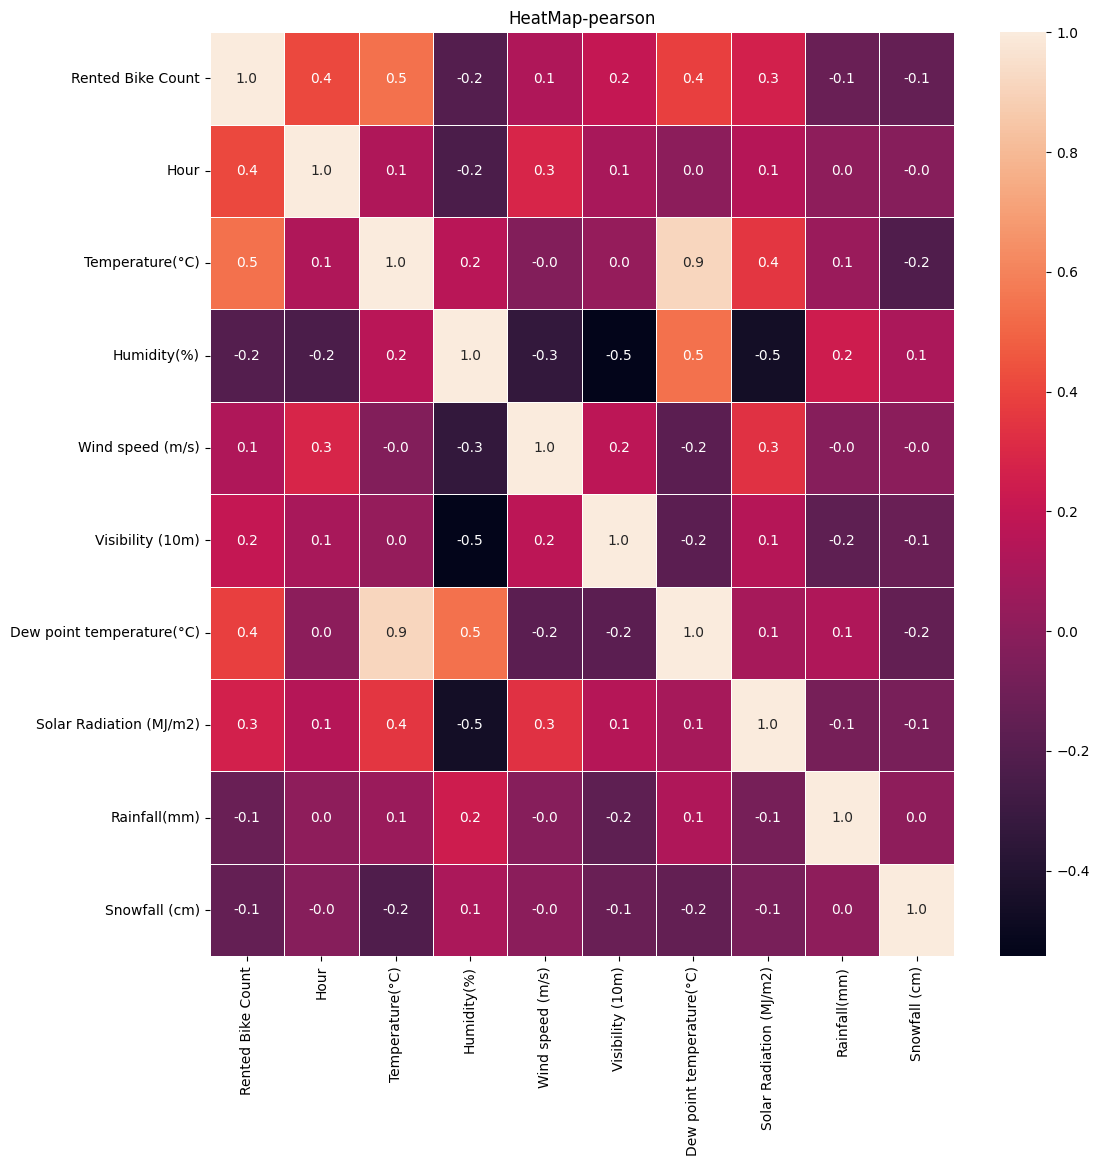

In [6]:
f,ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

plt.title("HeatMap-spearman")

plt.show()

f,ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

plt.title("HeatMap-pearson")

plt.show()

# روند کلی میزان تقاضا دوچرخه در طول یک سال داخل دیتاست

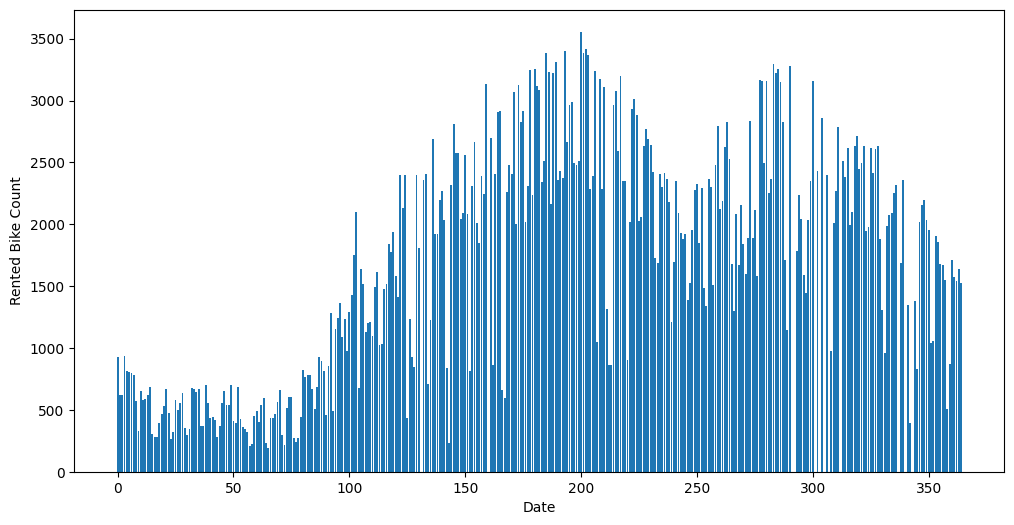

In [7]:
import matplotlib.dates
plt.figure(figsize = (12,6))  #اندازه نمودار
plt.bar(df['Date'],df['Rented Bike Count'])
plt.xlabel("Date")
plt.ylabel("Rented Bike Count")
plt.xscale('linear') #scale of x axis


# مقدار تکرار هر میزان تقاضا دوچرخه

(0.0, 4000.0, 0.0, 2000.0)

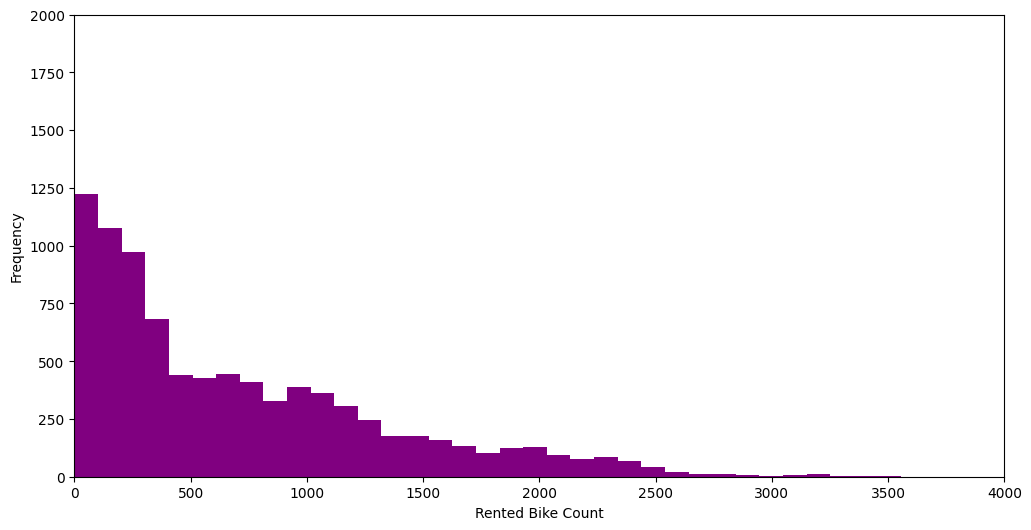

In [8]:
plt.figure(figsize = (12,6))
plt.hist(df['Rented Bike Count'],color='purple',bins = 35)
plt.ylabel('Frequency')
plt.xlabel('Rented Bike Count')
plt.axis([0,4000,0,2000])

نرمال شده نمودار بالا

(0.0, 60.0, 0.0, 750.0)

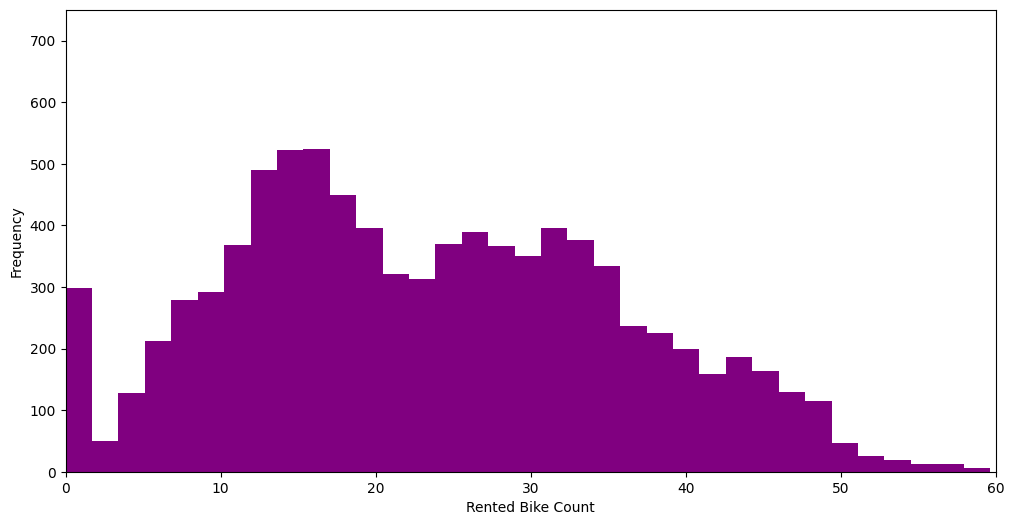

In [9]:
import math
import numpy
plt.figure(figsize = (12,6))
list1=list(df['Rented Bike Count']).copy()
for count in range(len(list1)) :
  list1[count] = list1[count] ** 0.5
plt.hist(list1,color='purple',bins = 35)
plt.ylabel('Frequency')
plt.xlabel('Rented Bike Count')
plt.axis([0,60,0,750])

# نمودار جعبه ای

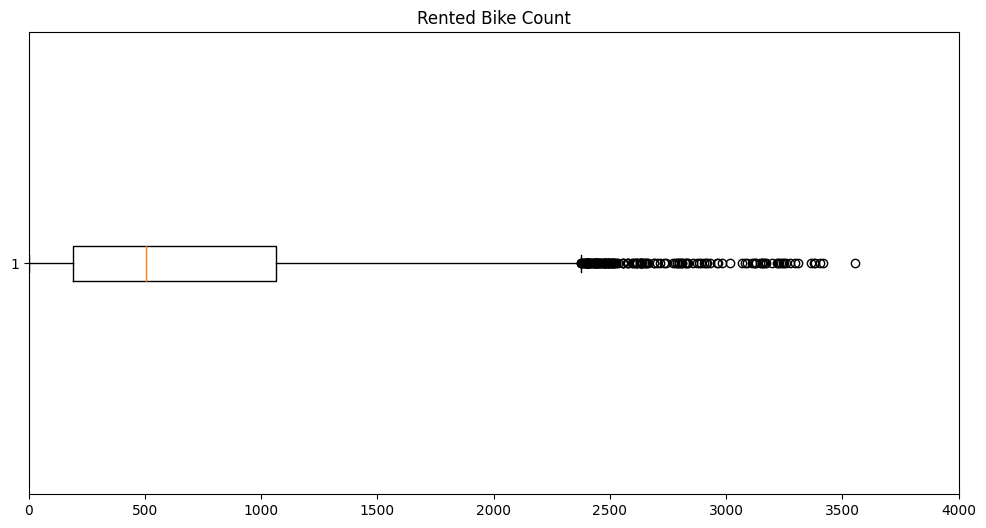

In [10]:
plt.figure(figsize = (12,6))
plt.title('Rented Bike Count')
plt.boxplot(df['Rented Bike Count'],vert= False)
plt.axis([0,4000,0,2])
plt.show()

نمودار جعبه ای داده های نرمال شده

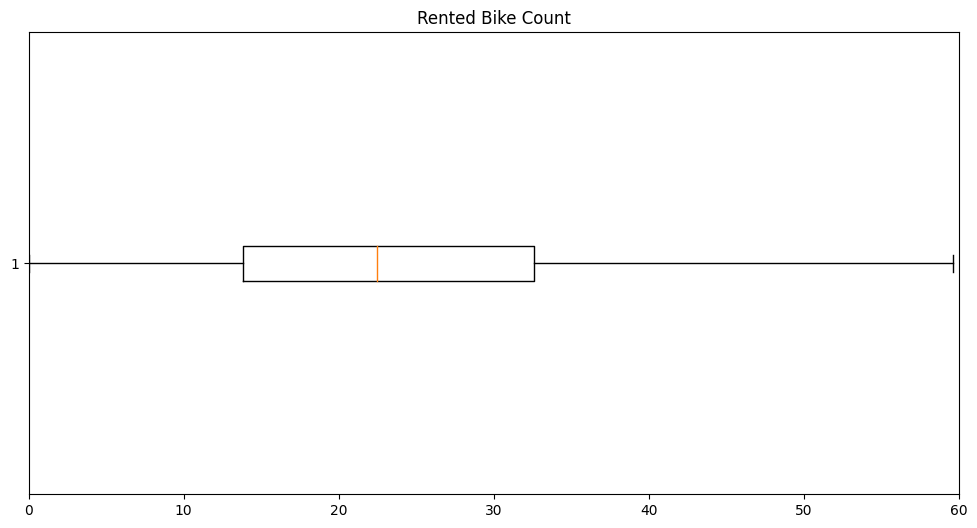

In [11]:
plt.figure(figsize = (12,6))
plt.title('Rented Bike Count')
plt.boxplot(list1,vert= False)
plt.axis([0,60,0,2])
plt.show()

# ((نمودار های مربوط به(( ماه))  و ((فصل)) و ((روز هفته

Text(0.5, 1.0, 'Average users count by hour of the day across seasons')

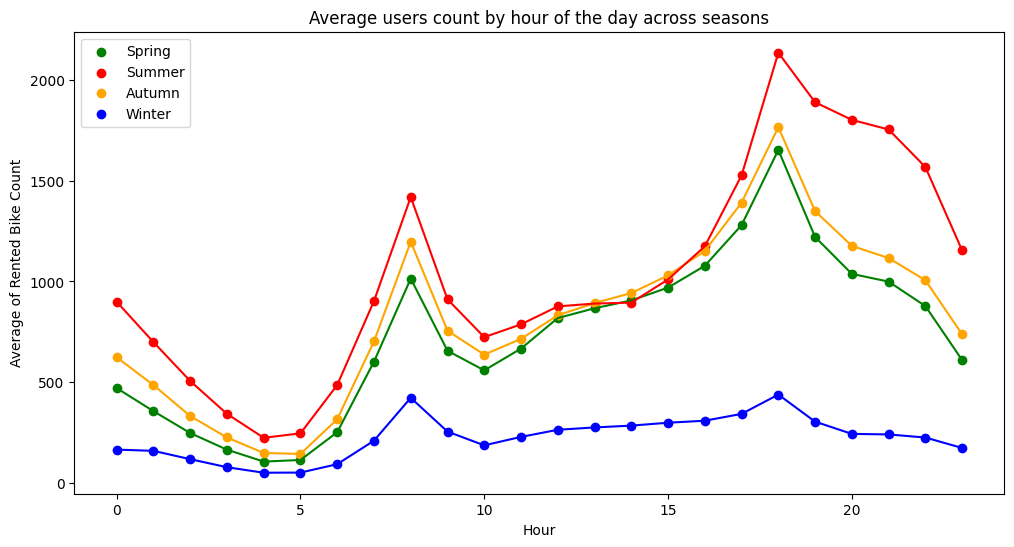

In [12]:
springdata=df[df.Seasons == 'Spring'][['Rented Bike Count','Hour']]
summerdata=df[df.Seasons == 'Summer'][['Rented Bike Count','Hour']]
autumndata=df[df.Seasons == 'Autumn'][['Rented Bike Count','Hour']]
winterdata=df[df.Seasons == 'Winter'][['Rented Bike Count','Hour']]
spring_list = []
summer_list = []
autumn_list = []
winter_list = []
springdata = springdata.reset_index()
summerdata = summerdata.reset_index()
autumndata = autumndata.reset_index()
winterdata = winterdata.reset_index()

#spring
for a in range(0, 24):
  spring_count = 0
  for count, value in enumerate(springdata["Rented Bike Count"]):
    if springdata["Hour"][count] == a:
      spring_count += value
  spring_list.append(spring_count / (springdata.shape[0]/24))
#summer
for a in range(0, 24):
  summer_count = 0
  for count, value in enumerate(summerdata["Rented Bike Count"]):
    if summerdata["Hour"][count] == a:
      summer_count += value
  summer_list.append(summer_count / (summerdata.shape[0]/24))

#autumn
for a in range(0, 24):
  autumn_count = 0
  for count, value in enumerate(autumndata["Rented Bike Count"]):
    if autumndata["Hour"][count] == a:
      autumn_count += value
  autumn_list.append(autumn_count / (autumndata.shape[0]/24))

#winter
for a in range(0, 24):
  winter_count = 0
  for count, value in enumerate(winterdata["Rented Bike Count"]):
    if winterdata["Hour"][count] == a:
      winter_count += value
  winter_list.append(winter_count / (winterdata.shape[0]/24))

#print(spring_list)
#print(summer_list)
#print(autumn_list)
#print(winter_list)
plt.figure(figsize = (12,6))
plt.xlabel("Hour")
plt.ylabel("Average of Rented Bike Count")
plt.scatter(range(0,24), spring_list,label='Spring',color='green')
plt.scatter(range(0,24), summer_list,label="Summer",color='red')
plt.scatter(range(0,24), autumn_list,label="Autumn",color='orange')
plt.scatter(range(0,24), winter_list,label="Winter",color='blue')
plt.legend(loc=2)
plt.plot(range(0,24), spring_list,label='Spring',color='green')
plt.plot(range(0,24), winter_list,label="Winter",color='blue')
plt.plot(range(0,24), autumn_list,label="Autumn",color='orange')
plt.plot(range(0,24), summer_list,label="Summer",color='red')

plt.title("Average users count by hour of the day across seasons")


Text(0.5, 1.0, 'Average users count by hour of the day across Weekdays')

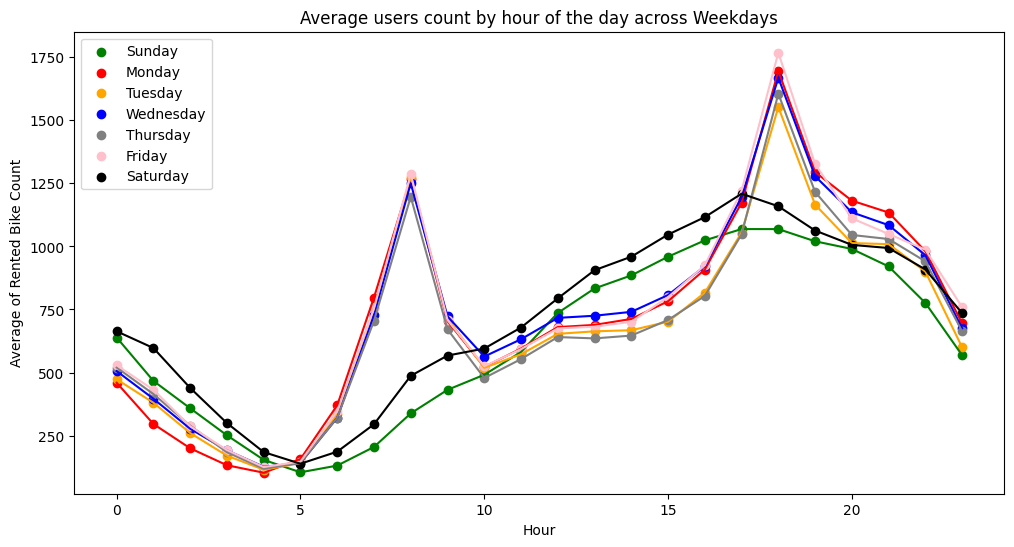

In [17]:
df2 = pd.read_csv('Maindata\data_month_day.csv',encoding='ISO-8859-1')

sundaydata=df2[df2.Weekday == 1][['Rented Bike Count','Hour']]
mondaydata=df2[df2.Weekday == 2][['Rented Bike Count','Hour']]
tuesdaydata=df2[df2.Weekday == 3][['Rented Bike Count','Hour']]
wednesdaydata=df2[df2.Weekday == 4][['Rented Bike Count','Hour']]
thursdaydata=df2[df2.Weekday == 5][['Rented Bike Count','Hour']]
fridaydata=df2[df2.Weekday == 6][['Rented Bike Count','Hour']]
saturdaydata=df2[df2.Weekday == 7][['Rented Bike Count','Hour']]
sunday_list = []
monday_list = []
tuesday_list = []
wednesday_list = []
thursday_list = []
friday_list = []
saturday_list = []

sundaydata = sundaydata.reset_index()
mondaydata = mondaydata.reset_index()
tuesdaydata = tuesdaydata.reset_index()
wednesdaydata = wednesdaydata.reset_index()
thursdaydata = thursdaydata.reset_index()
fridaydata = fridaydata.reset_index()
saturdaydata = saturdaydata.reset_index()


#sunday
for a in range(0, 24):
  sunday_count = 0
  for count, value in enumerate(sundaydata["Rented Bike Count"]):
    if sundaydata["Hour"][count] == a:
      sunday_count += value
  sunday_list.append(sunday_count / (sundaydata.shape[0]/24))

#monday
for a in range(0, 24):
  monday_count = 0
  for count, value in enumerate(mondaydata["Rented Bike Count"]):
    if mondaydata["Hour"][count] == a:
      monday_count += value
  monday_list.append(monday_count / (mondaydata.shape[0]/24))

#tuesday
for a in range(0, 24):
  tuesday_count = 0
  for count, value in enumerate(tuesdaydata["Rented Bike Count"]):
    if tuesdaydata["Hour"][count] == a:
      tuesday_count += value
  tuesday_list.append(tuesday_count / (tuesdaydata.shape[0]/24))

#wednesday
for a in range(0, 24):
  wednesday_count = 0
  for count, value in enumerate(wednesdaydata["Rented Bike Count"]):
    if wednesdaydata["Hour"][count] == a:
      wednesday_count += value
  wednesday_list.append(wednesday_count / (wednesdaydata.shape[0]/24))

#thursday
for a in range(0, 24):
  thursday_count = 0
  for count, value in enumerate(thursdaydata["Rented Bike Count"]):
    if thursdaydata["Hour"][count] == a:
      thursday_count += value
  thursday_list.append(thursday_count / (thursdaydata.shape[0]/24))

#friday
for a in range(0, 24):
  friday_count = 0
  for count, value in enumerate(fridaydata["Rented Bike Count"]):
    if fridaydata["Hour"][count] == a:
      friday_count += value
  friday_list.append(friday_count / (fridaydata.shape[0]/24))

#saturday
for a in range(0, 24):
  saturday_count = 0
  for count, value in enumerate(saturdaydata["Rented Bike Count"]):
    if saturdaydata["Hour"][count] == a:
      saturday_count += value
  saturday_list.append(saturday_count / (saturdaydata.shape[0]/24))


plt.figure(figsize = (12,6))
plt.xlabel("Hour")
plt.ylabel("Average of Rented Bike Count")

plt.scatter(range(0,24), sunday_list,label='Sunday',color='green')
plt.scatter(range(0,24), monday_list,label="Monday",color='red')
plt.scatter(range(0,24), tuesday_list,label="Tuesday",color='orange')
plt.scatter(range(0,24), wednesday_list,label="Wednesday",color='blue')
plt.scatter(range(0,24), thursday_list,label="Thursday",color='gray')
plt.scatter(range(0,24), friday_list,label="Friday",color='pink')
plt.scatter(range(0,24), saturday_list,label="Saturday",color='black')
plt.legend(loc=2)
plt.plot(range(0,24), sunday_list,label='Sunday',color='green')
plt.plot(range(0,24), monday_list,label="Monday",color='red')
plt.plot(range(0,24), tuesday_list,label="Tuesday",color='orange')
plt.plot(range(0,24), wednesday_list,label="Wednesday",color='blue')
plt.plot(range(0,24), thursday_list,label="Thursday",color='gray')
plt.plot(range(0,24), friday_list,label="Friday",color='pink')
plt.plot(range(0,24), saturday_list,label="Saturday",color='black')


plt.title("Average users count by hour of the day across Weekdays")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


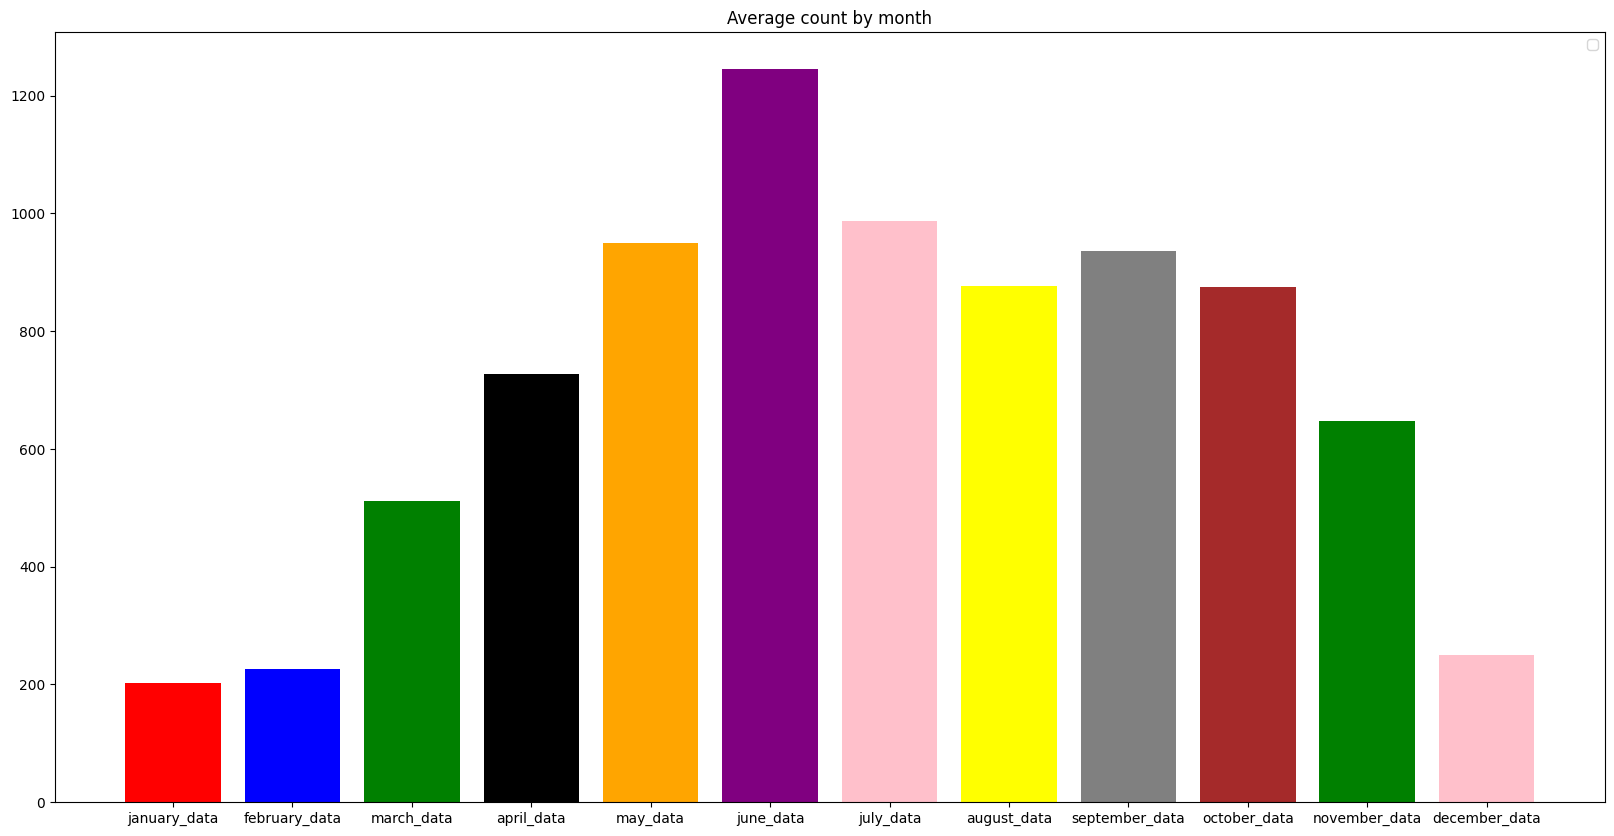

In [18]:
january_data = 0
february_data = 0
march_data = 0
april_data = 0
may_data = 0
june_data = 0
july_data = 0
august_data = 0
september_data = 0
october_data = 0
november_data = 0
december_data = 0
  
month_list = [january_data, february_data, march_data, april_data, may_data, june_data, july_data, august_data, september_data, october_data, november_data, december_data]
month_name = ["january_data", "february_data", "march_data", "april_data", "may_data", "june_data", "july_data", "august_data", "september_data", "october_data", "november_data", "december_data"]
color_list = ['red','blue','green','black','orange','purple','pink','yellow','gray','brown','green','pink']
for a in range(1, 13):
  _list = df2[df2.Month == a]['Rented Bike Count']
  for value in _list:
    month_list[a-1] += value
  month_list[a-1] /= _list.shape[0]

plt.figure(figsize = (20,10))
plt.bar(month_name, month_list,color=color_list)
plt.title("Average count by month")
plt.legend()
plt.show()